### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************************************************************************************************************************YuYA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [ ]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="Hello Krish! That's great to hear that you enjoy playing cricket. Cricket is a fantastic sport that requires skill, strategy, and teamwork. Whether you play as a batsman, bowler, or fielder, each role offers unique challenges and excitement.\n\nIf you have any questions about cricket, tips on how to improve your game, or anything else cricket-related, feel free to ask!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 39, 'total_tokens': 118, 'completion_time': 0.395, 'prompt_time': 0.004205269, 'queue_time': 0.225996294, 'total_time': 0.399205269}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-9bbe32ce-bcac-4f94-97fb-7d0c1d61690c-0', usage_metadata={'input_tokens': 39, 'output_tokens': 79, 'total_tokens': 118})

### We Will start With Creating Nodes

In [6]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

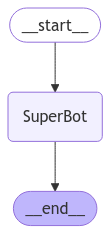

In [9]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [10]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='a28ca34c-eada-478e-8ed8-ef3759447093'),
  AIMessage(content="Hello Krish! Nice to meet you. Cricket is a fantastic sport, isn't it? Do you enjoy playing cricket or are you more into watching the matches? Who is your favorite cricket player? Feel free to share more about what you like about the sport!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 39, 'total_tokens': 92, 'completion_time': 0.265, 'prompt_time': 0.004223914, 'queue_time': 0.236344133, 'total_time': 0.269223914}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-a20669ad-74bd-440e-96f1-e368a5a9cdce-0', usage_metadata={'input_tokens': 39, 'output_tokens': 53, 'total_tokens': 92})]}

#### Streaming The responses

In [18]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Krish! It's nice to meet you. How can I assist you today? Is there anything specific you would like to talk about or any questions you have?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 35, 'total_tokens': 69, 'completion_time': 0.17, 'prompt_time': 0.003981866, 'queue_time': 0.226247007, 'total_time': 0.173981866}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-cb7964d1-a9df-477e-b016-539ee446c375-0', usage_metadata={'input_tokens': 35, 'output_tokens': 34, 'total_tokens': 69})]}}
